O caixeiro com gasolina infinita (e sem conciência ambiental)
========================================



## Introdução



Nesse experimento, são aplicados operadores de **algoritmos genéticos** como Seleção, Mutação e Cruzamento para que seja possível encontrar qual é a sequência de cidades visitadas que fornece a maior distância possível a ser percorrida - e é desse detalhe que surge o nome do experimento, "O caixeiro com gasolina infinita". Para isso, 7 cidades são geradas aleatoriamente com suas respectivas coordenadas $(x, y)$ e o trajeto deve ser realizado de modo a considerar que o caixeiro anda apenas em linha reta e não visita nenhuma outra cidade, além da inicial, mais de uma vez.

Por tratar-se de algoritmos genéticos, as possibilidades de caminhos a serem percorridos serão aqui chamados de indivíduos, que são compostos por genes. Nesse mesmo sentido, um conjunto de indivíduos formam populações que armazenam em si trajetos possíveis para o caixeiro viajante, mesmo que não sejam o melhor para o problema. Desse modo, após todas as operações, a população deve conter os melhores candidatos para aquele número de gerações e, portanto, a solução para questão é o melhor indivíduo da população. Para essa classificação de melhor ou pior, é introduzido o conceito de fitness, uma medida que indica o desempenho do indivíduo e que é definido por meio da função objetivo. Como o problema do caixeiro com gasolina trata-se de uma maximização, uma vez que busca o **maior** caminho, o fitness calcula a distância e os demais operadores responsabilizam-se por priorizar nas populações os indivíduos que possuem os maiores fitness. 

## Objetivo



Encontrar o caminho de maior distância no problema do caixeiro viajante e demonstrar ele de forma gráfica.

## Importações



In [20]:
import random
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_torneio_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



Sabendo que algoritmos genéticos não são determinísticos e têm seus resultados influenciados pela quantidade de vezes com que o código for executado, parâmetros como **<u>tamanho da população</u>** e **<u>número de gerações</u>** são fundamentais para determinar quantas populações serão consideradas suficientes para fornecer uma resposta satisfatória para o problema. Entretanto, são as operações darwinianas que irão fazer com que a população seja composta pelos melhores indivíduos.

Nesse caso, a ___seleção___ será realizada de qualquer maneira e não depende de uma constante que defina a chance desse evento ocorrer. Embora a _seleção por roleta_ também funcione para maximizar, os individuos que formarão as novas população serão aqui selecionadas pelo _método do torneio_ e, por isso, deve ser definida a constante relacionada ao **<u>número de combatentes por torneio</u>** (comumente assumem valores pequenos como 2 e 3). Nesse tipo de operação, 3 indivíduos da população são aleatoriamente escolhidos e aquele que possuir o maior fitness segue para a próxima geração. As implementações das funções que descrevem esse e os demais processos encontram-se no arquivo [funcoes.py](https://github.com/selaxco/aula_redes/blob/main/AlgoritmosGeneticos/funcoes.py) presente na pasta [AlgoritmosGeneticos](https://github.com/selaxco/aula_redes/tree/main/AlgoritmosGeneticos) desse mesmo repositório.

O ___cruzamento___, assim como na Biologia, há uma chance de ocorrer e, por isso, é preciso que a constante de **<u>chance de cruzamento</u>** seja previamente informada. Ademais, o tipo de cruzamento utilizado para o problema do caixeiro viajante é o ordenado, pois é importante que os genes não se repitam. Para que esse processo seja realizado, os pais são definidos como uma lista dos indivíduos que ocupam as posições pares na lista que representa a população, enquanto que as mães ocupam as ímpares. Na implementação dessa função, são determinadas duas posições de corte tanto para a mãe, quanto para o pai, e os genes contidos nesse intervalo serão os primeiros dos filhos. O genes restantes serão aqueles que não estão presentes no intervalo do pai, mas adicionados na ordem que encontram-se na mãe, e vice-versa.

Por fim, a ___mutação___ deve ocorrer levando em consideração que os genes, ou seja, as cidades, não podem se repetir. Assim como o cruzamento, não é sempre que ocorre e, por isso, precisa ter a constante de  **<u>chance de mutação</u>** definida. Dessa forma, o tipo de mutação implementada é a de troca, que define duas posições aleatórias do indivíduo para serem trocadas. Uma chance de mutação é sorteada para cada indivíduo da população.

In [21]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 7
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

Algumas funções locais são definidas para simplificar funções que exigem que constantes sejam passadas como parâmetro também. Nesse caso, o dicionário contendo as informações a respeito das coordenadas das cidades é utilizado para o cálculo das distâncias nas funções objetivo.

In [3]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

Após a execução de cada geração, busca-se o indivíduo da população que possui o maior fitness, ou seja, a maior distância. Quando todas as gerações forem executadas, o resultado será justamente a solução para esse problema.

In [9]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)
melhor_fitness_ja_visto = 0 # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness   

In [10]:
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 5', 'Cidade 4', 'Cidade 2', 'Cidade 6', 'Cidade 1', 'Cidade 3', 'Cidade 0'] com distância: 4.0176392195397925


Para exibir o caminho de forma gráfica, utiliza-se a biblioteca NetworkX para plotar os grafos. 

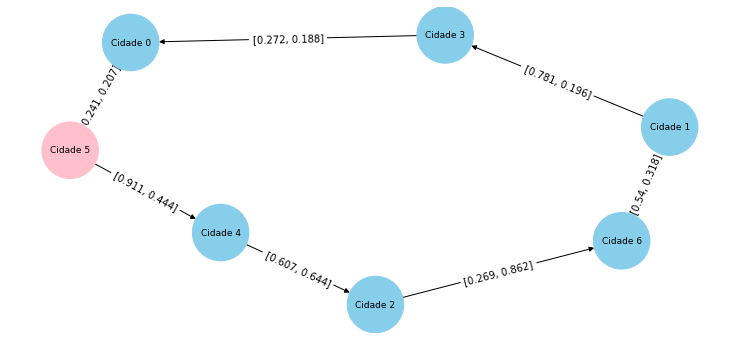

In [23]:
# Criando um grafo direcional vazio
grafo = nx.DiGraph()

# Adicionando vértices
grafo.add_nodes_from(melhor_individuo_ja_visto)

# Adicionando arestas e atributos
for i in range(len(melhor_individuo_ja_visto)):
    distanciax = round(CIDADES[melhor_individuo_ja_visto[i]][0], 3)
    distanciay = round(CIDADES[melhor_individuo_ja_visto[i]][1], 3)
    
    if i == len(melhor_individuo_ja_visto) - 1:
        grafo.add_edge(melhor_individuo_ja_visto[i], melhor_individuo_ja_visto[0], peso=[distanciax, distanciay])
    else:
        grafo.add_edge(melhor_individuo_ja_visto[i], melhor_individuo_ja_visto[i + 1], peso=[distanciax, distanciay])

cores = ['pink', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue']

# Plotando o grafo
plt.figure(figsize=(13, 6)) # Aumenta o tamanho da tela de exibição
pos = nx.spring_layout(grafo)  # Define a posição dos vértices
labels = nx.get_edge_attributes(grafo, 'peso')  # Obtém os atributos das arestas

nx.draw_networkx(grafo, pos=pos, with_labels=True, node_color=cores, node_size=3200, font_size=9)
nx.draw_networkx_edge_labels(grafo, pos=pos, edge_labels=labels)

plt.axis('off')  # Desativa os eixos
plt.show()


## Conclusão



Nesse experimento foi solucionado o problema do caixeiro viajante com gasolina infinita, que busca encontrar qual sequência de cidades que fornece a maior distância possível. Para isso, foram utilizados recursos de algoritmos genéticos como seleção, cruzamento e mutação, executando o código por um número de gerações previamente definido. Vale ressaltar que esse tipo de algoritmo fornece um resultado probabilístico, pois é dependente da quantidade de gerações executadas.

## Playground

